In [2]:
import matplotlib
%matplotlib inline
from pylab import *
from readsnapsgl import readsnapgd
from scipy.spatial import cKDTree
import h5py
import os

fpath = "/home2/weiguang/MUSIC/MUSIC_PLANCK/" # for orignial data
Mpath = fpath + "GAS_STARS/"
Xpath = fpath + "GAS_STARS_AGN/"
Xspath = "/home2/weiguang/The300/data/simulation/GadgetX/"


matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

# High redshifts: 0.53  1.03  2.33  4.04
#        snap MD: 109   096   074   055
#     snap MUSIC: 010   007   005   001     ** 010 --> 0.538
#       snap G3X: 109   096   074   055     ** 109 --> 0.523

# MD npy files:
#  #ID Mvir Rvir X Y Z rs_klypin M200c M500c M2500c
##############################################################
#"out_110.list.gz","out_96.list.gz","out_78.list.gz","out_55.list.gz"
# Rockcata-all-info-z4.04.npy
# Rockcata-all-info-z2.03.npy
# Rockcata-all-info-z1.03.npy
# Rockcata-all-info-z0.49.npy

In [3]:
# Readin all data
# Now rockstar halos are distinct!!
DMall200 = {}; DMall500 = {}; Musicall = {}; G3Xall = {}; GIZMOall = {}
Rockred=["z0.0","z0.53","z1.03","z2.33","z4.04"]
Musicsn=["snap_017","snap_010","snap_007","snap_005","snap_001"]
G3Xsnap=["snap_128","snap_109","snap_096","snap_074","snap_055"]
for red in Rockred:
    DMall200[red]=np.load("../MultiDark-Zoom/Rockcata-all-HM200-"+red+".npy")
    DMall500[red]=np.load("../MultiDark-Zoom/Rockcata-all-HM500-"+red+".npy")
    #ID[0] Mvir[1] Rvir[2] X[3] Y[4] Z[5] rs_klypin[6] M200c[7] M500c[8] M2500c[9]
for i, sn in enumerate(Musicsn):
    Musicall[sn] = np.load("../Halo_mass_function_mass-difference/MUSIC/Music_Mass_"+sn+"info.npy")
    #regionID[0] hID[1] Mvir[2] Xc[3] Yc[4] Zc[5] Rvir[6] fMhires[7] cNFW[8] M500[9] R500[10] fgas[11] f*[12]
for sn in G3Xsnap:
    G3Xall[sn] = np.load("../Halo_mass_function_mass-difference/GadgetX/G3X_Mass_"+sn+"info.npy")
for sn in G3Xsnap:
    GIZMOall[sn] = np.load("../Halo_mass_function_mass-difference/GIZMO/GS_Mass_"+sn+"info.npy")
#ReginIDs HIDs  HosthaloID Mvir(4) Xc(6)   Yc(7)   Zc(8)  Rvir(12) fMhires(38) cNFW (42) Mgas200 M*200 M500  R500 fgas500 f*500

In [4]:
#M200
bn=bins=np.arange(13,15.9,0.002)
HDM200={}; HMusic200={}; HG3X200={}; HGS200={}
HDM500={}; HMusic500={}; HG3X500={}; HGS500={}

for red in Rockred:
    HDM200[red],x=np.histogram(np.log10(DMall200[red][:,7]),bins=bn)
    HDM500[red],x=np.histogram(np.log10(DMall500[red][:,8]),bins=bn)
for sn in Musicsn:
    HMusic200[sn],x=np.histogram(np.log10(Musicall[sn][:,2]),bins=bn)
    HMusic500[sn],x=np.histogram(np.log10(Musicall[sn][:,9]*1.0e10),bins=bn)
for sn in G3Xsnap:
    HG3X200[sn],x=np.histogram(np.log10(G3Xall[sn][:,3]),bins=bn)
    HG3X500[sn],x=np.histogram(np.log10(G3Xall[sn][:,12]*1.0e10),bins=bn)
for sn in G3Xsnap:
    HGS200[sn],x=np.histogram(np.log10(GIZMOall[sn][:,3]),bins=bn)
    HGS500[sn],x=np.histogram(np.log10(GIZMOall[sn][:,12]),bins=bn)

In [9]:
HDM200[Rockred[0]].sum(), HMusic200[Musicsn[0]].sum(), HG3X200[G3Xsnap[0]].sum()

(375038, 5533, 5009)

In [5]:
def cross_point(x1,f1,x2,f2,pout=False):
    fp2= interp(x1, x2, f2)
    diff=fp2-f1
#     diff*=diff[0]
    cpid=np.where(np.abs(diff)<=0.01)[0]
    if pout:
        print((10.**x1/1.0e14).tolist(),(fp2-f1).tolist())
    return(x1[cpid[0]], f1[cpid[0]])

z=0.0 6.714288529268942 284 300 308 282
z=0.5 5.023425895230452 112 104 110 108
z=1.0 3.6224299841713212 26 38 27 27
z=2.3 1.099005839433403 3 3 3 3
z=4.0 0.26242185433852816 3 3 2 3
z=0.0 5.164163692727523 184 208 206 179
z=0.5 3.899419866770197 73 76 85 73
z=1.0 2.6485001386095934 28 36 30 28
z=2.3 0.822242649947648 3 3 3 3
z=4.0 0.21330449131471202 1 2 1 2


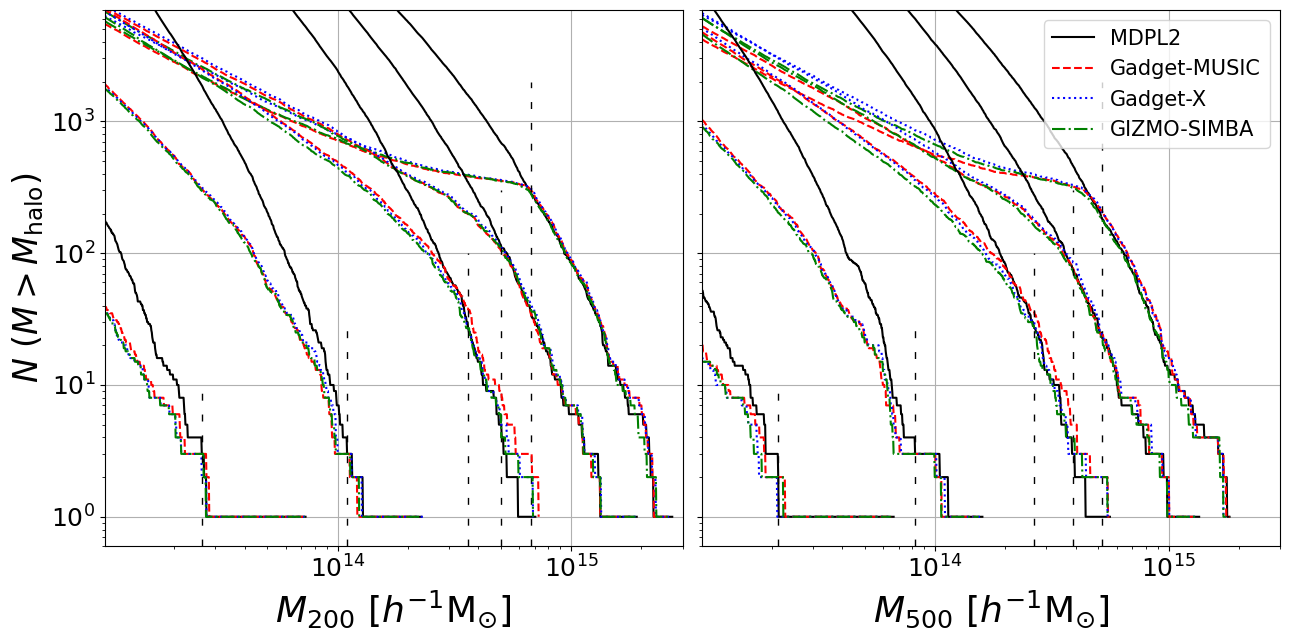

In [62]:
# New plot of HMF
reds=["z=0.0","z=0.5","z=1.0","z=2.3","z=4.0"]
bn=bins=np.arange(13,15.9,0.002)
x=(bn[1:]+bn[:-1])/2.
# fig=figure(1,figsize=(13,6.5))
fig,axs=subplots(1, 2, figsize=(13,6.5), sharey=True)
upl=[2.0e3,3.0e2,100,30,10]
ax1=axs[0]
for i in range(5):
    had=np.cumsum(HDM200[Rockred[i]][::-1])[::-1]
    idd=had>0
    ax1.plot(10.**x[idd], had[idd], 'k-')
    
    haa=np.cumsum(HMusic200[Musicsn[i]][::-1])[::-1]
    ids=haa>0
    ax1.plot(10.**x[ids], haa[ids], 'r--')

    hac=np.cumsum(HG3X200[G3Xsnap[i]][::-1])[::-1]
    ids=haa>0
    ax1.plot(10.**x[ids], haa[ids], 'b:')
    
    haa=np.cumsum(HGS200[G3Xsnap[i]][::-1])[::-1]
    ids=haa>0
    ax1.plot(10.**x[ids], haa[ids], 'g-.')
    (ml,N)=cross_point(x[ids],np.log10(haa[ids]),x[idd],np.log10(had[idd]))
    ml = 10**ml; N = 10**(N+0.05); 
    print(reds[i],ml/1.0e14, len(np.where(DMall200[Rockred[i]][:,7]>=ml)[0]), len(np.where(Musicall[Musicsn[i]][:,2]>=ml)[0]), 
          len(np.where(G3Xall[G3Xsnap[i]][:,3]>=ml)[0]), len(np.where(GIZMOall[G3Xsnap[i]][:,3]>=ml)[0]))
    ax1.plot([ml,ml],[0.6,upl[i]],'k--',dashes=(5, 10), lw=1)

ax1.set_xlabel(r'$M_{200}\ [h^{-1} {\rm M_{\odot}}]$',fontsize=26)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel("$N\ (M > M_{\\rm halo})$",fontsize=24)
ax1.set_xlim(1.01e13,3.0e15)
ax1.set_ylim(0.6,7.0e3)
ax1.grid()
# ax1.xticks(fontsize=17)
# ax1.yticks(fontsize=17)

ax2=axs[1] #subplot(122)
for i in range(5):
    had=np.cumsum(HDM500[Rockred[i]][::-1])[::-1]
    idd=had>0
    ax2.plot(10.**x[idd], had[idd], 'k-')


    haa=np.cumsum(HMusic500[Musicsn[i]][::-1])[::-1]
    ids=haa>0
    ax2.plot(10.**x[ids], haa[ids], 'r--')
    
    haa=np.cumsum(HG3X500[G3Xsnap[i]][::-1])[::-1]
    ids=haa>0
    ax2.plot(10.**x[ids], haa[ids], 'b:')
    
    haa=np.cumsum(HGS500[G3Xsnap[i]][::-1])[::-1]
    ids=haa>0
    ax2.plot(10.**x[ids], haa[ids], 'g-.')

    (ml,N)=cross_point(x[ids],np.log10(haa[ids]),x[idd],np.log10(had[idd]))
    ml = 10**ml; N = 10**(N+0.05); 
    
    print(reds[i],ml/1.0e14, len(np.where(DMall500[Rockred[i]][:,8]>=ml)[0]), len(np.where(Musicall[Musicsn[i]][:,9]*1.0e10>=ml)[0]), 
          len(np.where(G3Xall[G3Xsnap[i]][:,12]*1.0e10>=ml)[0]), len(np.where(GIZMOall[G3Xsnap[i]][:,12]>=ml)[0]))

    ax2.plot([ml,ml],[0.6,upl[i]],'k--',dashes=(5, 10),lw=1)


ax2.plot([],[],'k-',label='MDPL2')
ax2.plot([],[],'r--',label='Gadget-MUSIC')
ax2.plot([],[],'b:',label='Gadget-X')
ax2.plot([],[],'g-.',label='GIZMO-SIMBA')
ax2.legend(loc=1,fontsize=15) #,fontsize=18
# legend(loc=3,fontsize=16) #,fontsize=18
# ylabel("N",fontsize=20)
# xlim(6.0e13,4.0e15)
ax2.grid(True)
# tick_params(axis=u'x', which=u'x',labelright=True,length=1)
ax2.set_xlabel(r'$M_{500}\ [h^{-1} {\rm M_{\odot}}]$',fontsize=26)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(0.6,7.0e3)
ax2.set_xlim(1.01e13,3.0e15)
# ax2.xticks(fontsize=17)
# ax2.yticks(fontsize=17)
# ax2.set_setp(ax2.get_yticklabels(), visible=False)

fig.tight_layout()
fig.savefig("./plots/HMF.pdf",dpi=300)

In [14]:
#complete fractions
i=0
bn=bins=np.arange(13,15.9,0.002)
x=(bn[1:]+bn[:-1])/2.
had=np.cumsum(HDM500[Rockred[i]][::-1])[::-1]
idd=had>0
haa=np.cumsum(HMusic500[Musicsn[i]][::-1])[::-1]
ida=haa>0
hab=np.cumsum(HG3X500[G3Xsnap[i]][::-1])[::-1]
idb=hab>0
hac=np.cumsum(HGS500[G3Xsnap[i]][::-1])[::-1]
idc=hac>0
 
yMusic=np.interp(10.**x[idd],10.**x[ida], haa[ida])/had[idd]
yG3X=np.interp(10.**x[idd],10.**x[idb], hab[idb])/had[idd]
yGS=np.interp(10.**x[idd],10.**x[idc], hac[idc])/had[idd]
ids=x[idd]>np.log10(5.16e14)
yMusic[ids]=1; yMusic[yMusic>1]=1; yG3X[ids]=1; yG3X[yG3X>1]=1; yGS[ids]=1; yGS[yGS>1]=1;
np.savetxt("complete-fraction.txt",np.asarray([x[idd],yMusic,yG3X,yGS]).T, header="Mass [M_sun/h]    f_music    f_g3x    f_gizmo")

In [12]:
hac[idc]

array([6099, 6070, 6038, ...,    1,    1,    1])

In [10]:
yMusic.shape,ids.shape

((1131,), (1131,))

# do the differential HMF differences

In [21]:
ml200=np.array([6.714288529268942,5.023425895230452,3.6224299841713212,1.099005839433403,0.26242185433852816])*1e14
ml500=np.array([5.164163692727523,3.899419866770197,2.6485001386095934,0.822242649947648,0.21330449131471202])*1e14

In [25]:
#M200
bn=bins=np.arange(13,15.9,0.04)
HDDM200={}; HDMusic200={}; HDG3X200={}; HDGS200={}
# xDM200={}; xMusic200={}; xG3X200={}; xGS200={}
HDDM500={}; HDMusic500={}; HDG3X500={}; HDGS500={}
# xDM500={}; xMusic500={}; xG3X500={}; xGS500={}

for red in Rockred:
    HDDM200[red],x=np.histogram(np.log10(DMall200[red][:,7]),bins=bn)
    HDDM500[red],x=np.histogram(np.log10(DMall500[red][:,8]),bins=bn)
for sn in Musicsn:
    HDMusic200[sn],x=np.histogram(np.log10(Musicall[sn][:,2]),bins=bn)
    HDMusic500[sn],x=np.histogram(np.log10(Musicall[sn][:,9]*1.0e10),bins=bn)
for sn in G3Xsnap:
    HDG3X200[sn],x=np.histogram(np.log10(G3Xall[sn][:,3]),bins=bn)
    HDG3X500[sn],x=np.histogram(np.log10(G3Xall[sn][:,12]*1.0e10),bins=bn)
for sn in G3Xsnap:
    HDGS200[sn],x=np.histogram(np.log10(GIZMOall[sn][:,3]),bins=bn)
    HDGS500[sn],x=np.histogram(np.log10(GIZMOall[sn][:,12]),bins=bn)
xd=(bn[1:]+bn[:-1])/2

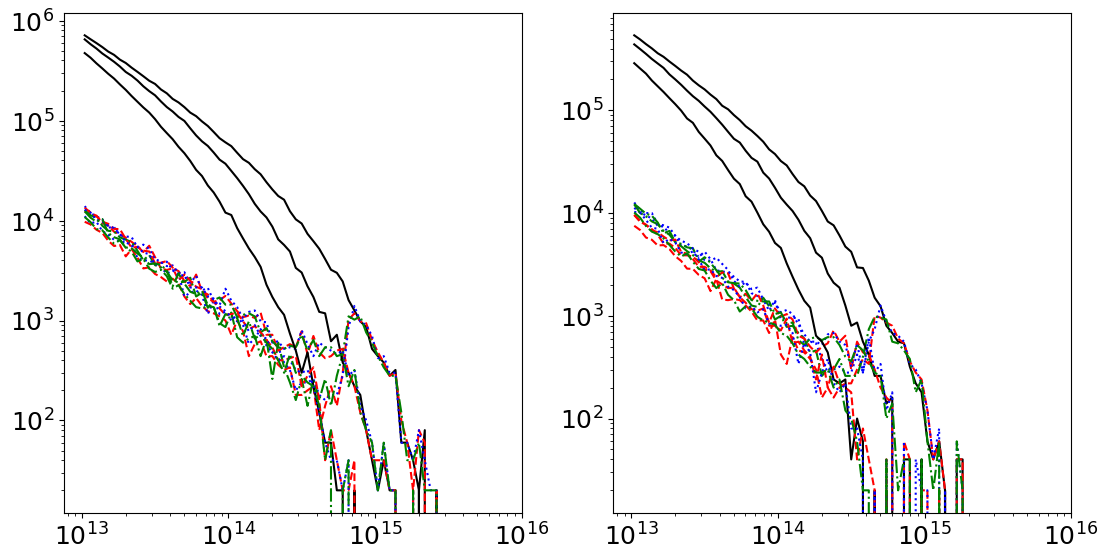

In [23]:
#test
fig=figure(figsize=(13,6.5))
subplot(121)
for i in range(3):
    plot(10.**xd, HDDM200[Rockred[i]]/0.05, 'k-')
    
    plot(10.**xd, HDMusic200[Musicsn[i]]/0.05, 'r--')

    plot(10.**xd, HDG3X200[G3Xsnap[i]]/0.05, 'b:')
    
    plot(10.**xd, HDGS200[G3Xsnap[i]]/0.05, 'g-.')
xscale('log'); yscale('log')
subplot(122)
for i in range(3):
    plot(10.**xd, HDDM500[Rockred[i]]/0.05, 'k-')
    
    plot(10.**xd, HDMusic500[Musicsn[i]]/0.05, 'r--')

    plot(10.**xd, HDG3X500[G3Xsnap[i]]/0.05, 'b:')
    
    plot(10.**xd, HDGS500[G3Xsnap[i]]/0.05, 'g-.')
xscale('log'); yscale('log')

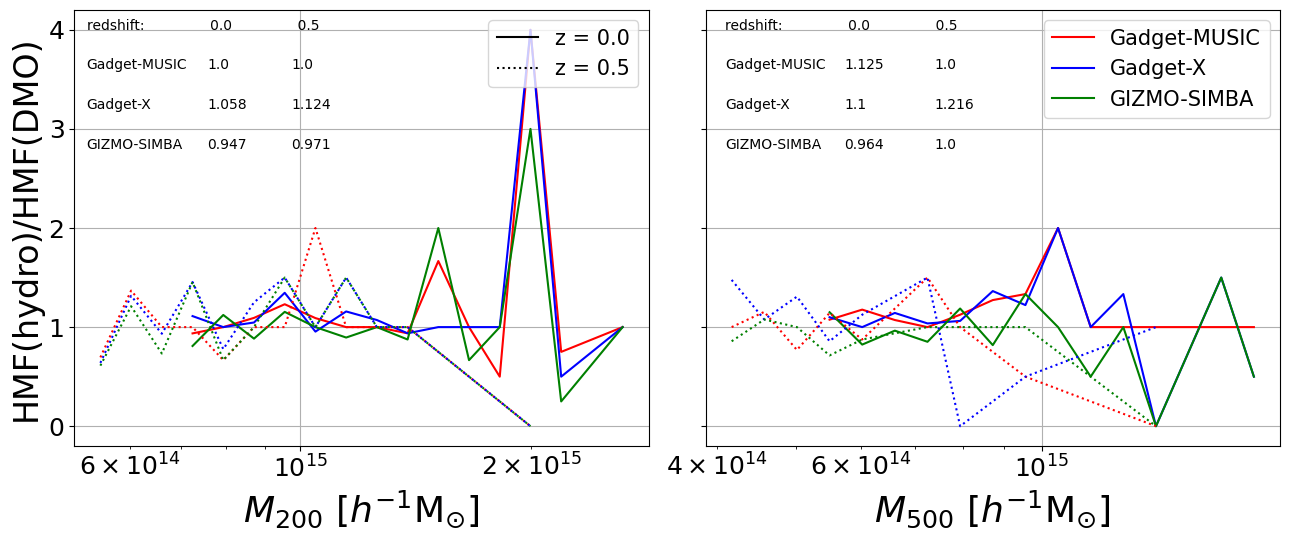

In [59]:
# New plot of DHMF differences
reds=["z=0.0","z=0.5","z=1.0","z=2.3","z=4.0"]
lsz=['-',':','--']
fig,axs=subplots(1, 2, figsize=(13,5.5), sharey=True)
# upl=[5,5,5,5,5]
ax1=axs[0]
ax1.text(ml200[1]*1.05,4.7-0.7,'redshift:               0.0               0.5')
ax1.text(ml200[1]*1.05,4.3-0.7,'Gadget-MUSIC')
ax1.text(ml200[1]*1.05,3.9-0.7,'Gadget-X')
ax1.text(ml200[1]*1.05,3.5-0.7,'GIZMO-SIMBA')
for i in range(2):
    ids=(xd>np.log10(ml200[i]))&(HDDM200[Rockred[i]]>0)
    ax1.plot(10.**xd[ids], HDMusic200[Musicsn[i]][ids]/HDDM200[Rockred[i]][ids], 'r', ls=lsz[i])
    ids2=(xd>np.log10(ml200[i]))&(HDDM200[Rockred[i]]>0)&(HDMusic200[Musicsn[i]]>8)
    ax1.text(10**(np.log10(ml200[2])+0.21+0.11*(i+1)),4.3-0.7, str(np.median(HDMusic200[Musicsn[i]][ids2]/HDDM200[Rockred[i]][ids2]))[:5])
    
    ax1.plot(10.**xd[ids], HDG3X200[G3Xsnap[i]][ids]/HDDM200[Rockred[i]][ids], 'b', ls=lsz[i])
    ids2=(xd>np.log10(ml200[i]))&(HDDM200[Rockred[i]]>0)&(HDG3X200[G3Xsnap[i]]>8)
    ax1.text(10**(np.log10(ml200[2])+0.21+0.11*(i+1)),3.9-0.7, str(np.median(HDG3X200[G3Xsnap[i]][ids2]/HDDM200[Rockred[i]][ids2]))[:5])
    
    ax1.plot(10.**xd[ids], HDGS200[G3Xsnap[i]][ids]/HDDM200[Rockred[i]][ids], 'g', ls=lsz[i])
    ids2=(xd>np.log10(ml200[i]))&(HDDM200[Rockred[i]]>0)&(HDGS200[G3Xsnap[i]]>8)
    ax1.text(10**(np.log10(ml200[2])+0.21+0.11*(i+1)),3.5-0.7, str(np.median(HDGS200[G3Xsnap[i]][ids2]/HDDM200[Rockred[i]][ids2]))[:5])
    # ax1.plot([ml200[i],ml200[i]],[0.6,upl[i]],'k--',dashes=(5, 10), lw=1)

ax1.set_xlabel(r'$M_{200}\ [h^{-1} {\rm M_{\odot}}]$',fontsize=26)
# ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel("HMF(hydro)/HMF(DMO)",fontsize=24)
# ax1.set_xlim(1.01e13,3.0e15)
# ax1.set_ylim(0.6,7.0e3)
ax1.grid()
ax1.plot([],[],'k-',label='z = 0.0')
ax1.plot([],[],'k:',label='z = 0.5')
ax1.legend(loc=1,fontsize=15)

ax2=axs[1] #subplot(122)
ax2.text(ml500[1]*1.05,4.7-0.7,'redshift:               0.0               0.5')
ax2.text(ml500[1]*1.05,4.3-0.7,'Gadget-MUSIC')
ax2.text(ml500[1]*1.05,3.9-0.7,'Gadget-X')
ax2.text(ml500[1]*1.05,3.5-0.7,'GIZMO-SIMBA')
for i in range(2):
    ids=(xd>np.log10(ml500[i]))&(HDDM500[Rockred[i]]>0)
    ax2.plot(10.**xd[ids], HDMusic500[Musicsn[i]][ids]/HDDM500[Rockred[i]][ids], 'r', ls=lsz[i])
    ids2=(xd>np.log10(ml500[i]))&(HDDM500[Rockred[i]]>0)&(HDMusic500[Musicsn[i]]>8)
    ax2.text(10**(np.log10(ml500[2])+0.225+0.11*(i+1)),4.3-0.7, str(np.median(HDMusic500[Musicsn[i]][ids2]/HDDM500[Rockred[i]][ids2]))[:5])
    
    ax2.plot(10.**xd[ids], HDG3X500[G3Xsnap[i]][ids]/HDDM500[Rockred[i]][ids], 'b', ls=lsz[i])
    ids2=(xd>np.log10(ml500[i]))&(HDDM500[Rockred[i]]>0)&(HDG3X500[G3Xsnap[i]]>8)
    ax2.text(10**(np.log10(ml500[2])+0.225+0.11*(i+1)),3.9-0.7, str(np.median(HDG3X500[G3Xsnap[i]][ids2]/HDDM500[Rockred[i]][ids2]))[:5])

    ax2.plot(10.**xd[ids], HDGS500[G3Xsnap[i]][ids]/HDDM500[Rockred[i]][ids], 'g', ls=lsz[i])
    ids2=(xd>np.log10(ml500[i]))&(HDDM500[Rockred[i]]>0)&(HDGS500[G3Xsnap[i]]>8)
    ax2.text(10**(np.log10(ml500[2])+0.225+0.11*(i+1)),3.5-0.7, str(np.median(HDGS500[G3Xsnap[i]][ids2]/HDDM500[Rockred[i]][ids2]))[:5])
    # ax2.plot([ml500[i],ml500[i]],[0.6,upl[i]],'k--',dashes=(5, 10), lw=1)


# ax2.plot([],[],'k-',label='MDPL2')
ax2.plot([],[],'r-',label='Gadget-MUSIC')
ax2.plot([],[],'b-',label='Gadget-X')
ax2.plot([],[],'g-',label='GIZMO-SIMBA')
ax2.legend(loc=1,fontsize=15) #,fontsize=18
# legend(loc=3,fontsize=16) #,fontsize=18
# ylabel("N",fontsize=20)
# xlim(6.0e13,4.0e15)
ax2.grid(True)
# tick_params(axis=u'x', which=u'x',labelright=True,length=1)
ax2.set_xlabel(r'$M_{500}\ [h^{-1} {\rm M_{\odot}}]$',fontsize=26)
# ax2.set_yscale('log')
ax2.set_xscale('log')
# ax2.set_ylim(0.6,7.0e3)
# ax2.set_xlim(1.01e13,3.0e15)
# ax2.xticks(fontsize=17)
# ax2.yticks(fontsize=17)
# ax2.set_setp(ax2.get_yticklabels(), visible=False)

fig.tight_layout()
fig.savefig("./plots/DHMF.pdf",dpi=300)

In [27]:
xd[ids].size, HG3X200[G3Xsnap[i]][ids].size, HDDM200[Rockred[i]][ids].size

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1450 but corresponding boolean dimension is 72

In [28]:
i,G3Xsnap[i],Rockred[i]

(0, 'snap_128', 'z0.0')